# Automating Google Stock Data Extraction and Visualization with Plotly

##### Author: Kliz John Andrei Millares

![Millares Logo](https://i.postimg.cc/FKfVkbnz/Millares-Logo01.png)

# Project Objective: Stock Price Analysis for Google (GOOGL)

## Objective
The primary goal of this project is to analyze the stock price trends of Alphabet Inc. (GOOGL) over a specified period. By leveraging web scraping techniques and historical data analysis, the project aims to provide a comprehensive overview of Google’s stock performance, highlighting key metrics such as current price, price change, percentage change, and market time notices. This analysis will be visualized using line graphs to depict the stock's historical price movements and provide insights into its trading behavior.

## Key Components
1. **Web Scraping Current Stock Data**:
   - Extract real-time stock data from Yahoo Finance using BeautifulSoup.
   - Retrieve essential details like stock title, current price, price change, percentage change, and market time notices.

2. **Historical Stock Data Analysis**:
   - Utilize the Yahoo Finance API via the `yfinance` library to fetch historical stock price data.
   - Analyze the closing prices over a specific period to understand long-term trends and patterns.


3. **Data Visualization**:
   - Create informative visualizations using Plotly.
   - Plot a line graph representing the historical closing prices of Google’s stock, providing a clear depiction of its performance over time.

## Tools and Libraries
- **BeautifulSoup**: For web scraping current stock data from Yahoo Finance.
- **yfinance**: For fetching historical stock price data.
- **Plotly**: For creating interactive and visually appealing graphs to illustrate stock price trends.

## Expected Outcomes
- A detailed report on Google’s current stock status, including real-time data points.
- A historical analysis of Google’s stock prices, highlighting significant trends and changes.
- Visual representations of the stock’s performance, enabling easy interpretation of data through line graphs.

This project aims to equip investors, analysts, and enthusiasts with a deeper understanding of Google’s stock dynamics, aiding in better investment decisions and market analysis.
isions and market analysis.
ons and market analysis.

## Import necessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Extracting data from yahoo finance

In [19]:
url = 'https://finance.yahoo.com/quote/GOOGL?p=GOOGL&.tsrc=fin-srch'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'}

html_page = requests.get(url, headers=headers)
soup = BeautifulSoup(html_page.content, 'lxml')

## I inspected the elements of yahoo finance to get the attributes

In [20]:
stock_section = soup.find_all(attrs={"data-testid": "quote-hdr"})
stock_title = stock_section[0].find('h1').text if stock_section else 'N/A'
print("Stock Title:", stock_title)

# Extract current price
current_price = soup.find(attrs={"data-testid": "qsp-price"}).find('span').text
print(f"Current Price: $",current_price)

# Extract price change
price_change = soup.find(attrs={"data-testid": "qsp-price-change"}).find('span').text
print("Price Change:", price_change)

# Extract percentage change
percentage_change = soup.find(attrs={"data-testid": "qsp-price-change-percent"}).find('span').text
print("Percentage Change:", percentage_change)

# Extract market time notice
market_time_notice = soup.find('div', slot='marketTimeNotice').find('span').text
print("Market Time Notice:", market_time_notice)

Stock Title: Alphabet Inc. (GOOGL)
Current Price: $ 172.11
Price Change: -3.79
Percentage Change: (-2.15%)
Market Time Notice: At close: May 30 at 4:00 PM EDT 


In [21]:
# Convert extracted values to numerical data
try:
    current_price_val = float(current_price.replace(',', ''))
    price_change_val = float(price_change.replace(',', ''))
    price_change_percent_val = float(percentage_change.strip('()%'))
except ValueError:
    current_price_val = price_change_val = price_change_percent_val = 0


## Let's visualize the price changes and the price of the stock over time

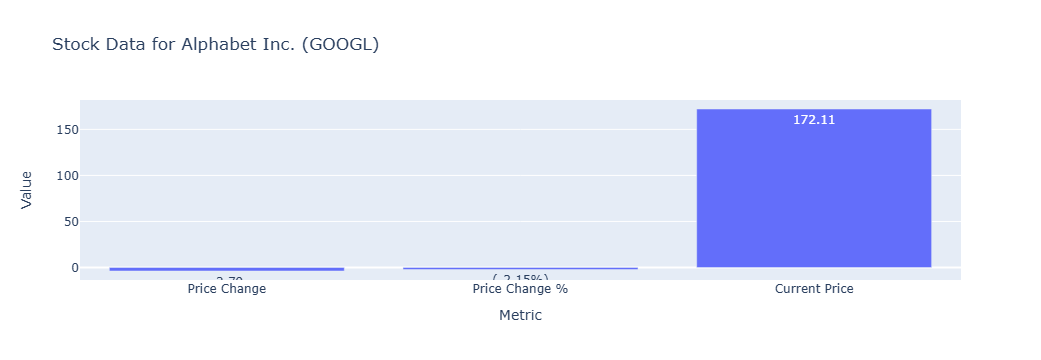

In [22]:
# Create a bar chart using Plotly
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=['Price Change', 'Price Change %', 'Current Price'],
           y=[price_change_val, price_change_percent_val, current_price_val],
           text=[price_change, percentage_change, current_price],
           textposition='auto')
)

# Update layout
fig.update_layout(title=f'Stock Data for {stock_title}',
                  xaxis_title='Metric',
                  yaxis_title='Value',
                  showlegend=False)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GOOGL: No data found for this date range, symbol may be delisted


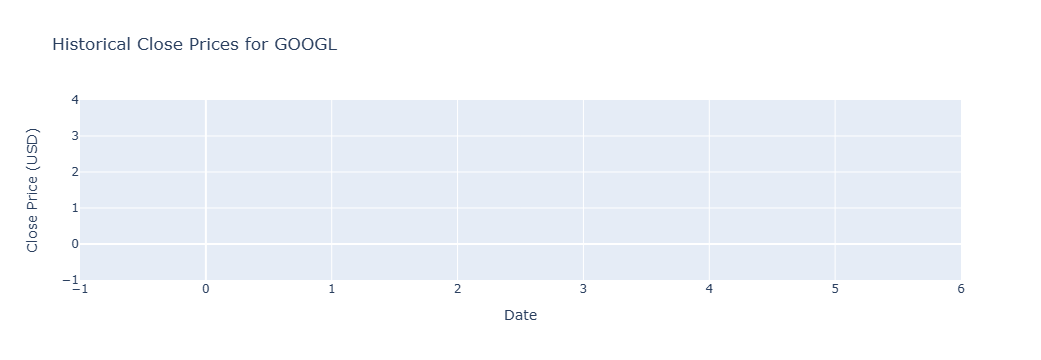

In [23]:
# Define the ticker symbol and time period
ticker = 'GOOGL'
start_date = '2023-01-01'
end_date = '2024-01-01'

# Fetch historical data using yfinance
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Create a line graph using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_data.index, 
                         y=stock_data['Close'], 
                         mode='lines', 
                         name='Close Price'))

# Update layout
fig.update_layout(title=f'Historical Close Prices for {ticker}',
                  xaxis_title='Date',
                  yaxis_title='Close Price (USD)',
                  showlegend=True)

# Show the plot
fig.show()